The dataset Education - Post 12th Standard.csv is a dataset which contains the names of various colleges.
This particular case study is based on various parameters of various institutions.
You are expected to do Principal Component Analysis for this case study according to the instructions given in the
following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: 
Data Dictionary.xlsx

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols
# from pingouin import pairwise_tukey
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler 

Read Education -Post 12th class dataset using Pandas read_csv method and explore first 5 rows of the data set.

Load the Dataset

In [89]:
data=pd.read_csv('/content/drive/MyDrive/Smita/Google Drive/Great Learning/Module _Projects_GL/Advance_Statistics/Education - Post 12th Standard-1.csv')


Top 5 records of dataset

In [90]:
data.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Exploratory Data Analysis

Check info and shape of the data set

In [91]:
data.shape

(777, 18)

There are total 777 rows and 18 columns in data set.

Information of the data set

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

There are no null values in data .All are integer and float data types except names which is object data type.

Let us check the types of variable in data frames.

In [93]:
data.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
data.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

Statistical summary of data

In [96]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Min application was 81,max is 48094 with average of 1558,deviation is 3870.Out of which maximum accepted application were 1110.
Overall enrolled for the education was 902 students only.

In [97]:
data['Names'].unique()

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Agnes Scott College',
       'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College', 'Alfred University',
       'Allegheny College', 'Allentown Coll. of St. Francis de Sales',
       'Alma College', 'Alverno College',
       'American International College', 'Amherst College',
       'Anderson University', 'Andrews University',
       'Angelo State University', 'Antioch University',
       'Appalachian State University', 'Aquinas College',
       'Arizona State University Main campus',
       'Arkansas College (Lyon College)', 'Arkansas Tech University',
       'Assumption College', 'Auburn University-Main Campus',
       'Augsburg College', 'Augustana College IL', 'Augustana College',
       'Austin College', 'Averett College', 'Baker University',
       'Baldwin-Wallace College', 'Barat College', 

To check for repetition we will see the value counts.If we see here all are 1 meaning they are not being repeated.

In [98]:
data['Names'].value_counts() 

Salem-Teikyo University               1
Hartwick College                      1
Concordia University                  1
Rutgers State University at Camden    1
College of Mount St. Joseph           1
                                     ..
Indiana Wesleyan University           1
Wesleyan University                   1
Salisbury State University            1
Illinois Institute of Technology      1
Mount Union College                   1
Name: Names, Length: 777, dtype: int64

In [99]:
data.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

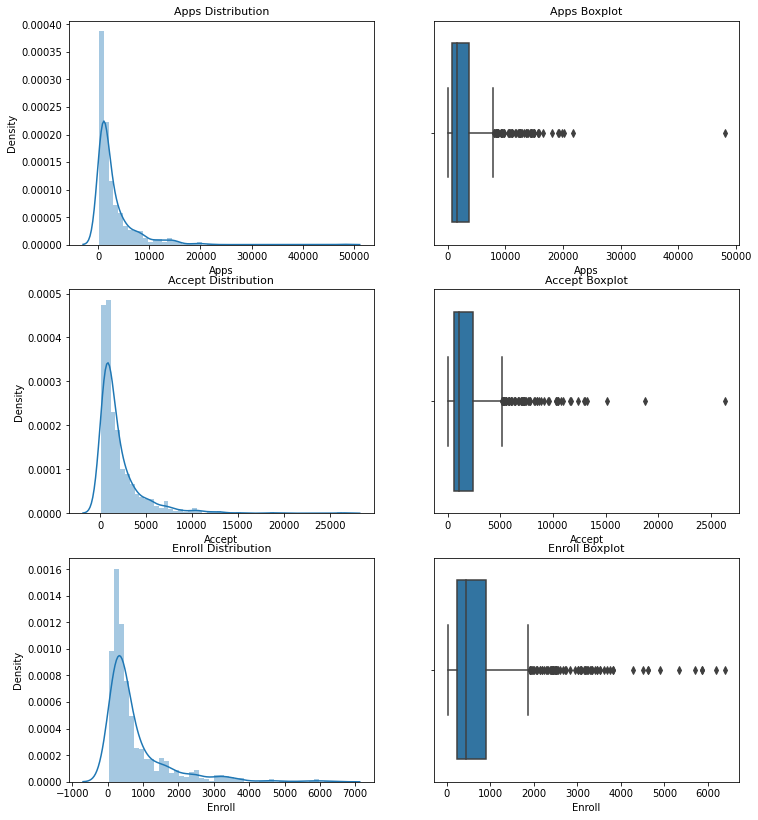

In [100]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(12,14)
a = sns.distplot(data['Apps'], ax = axes[0][0])
a.set_title('Apps Distribution', fontsize = 11)

a = sns.boxplot(data['Apps'],orient ="v", ax = axes[0][1])
a.set_title("Apps Boxplot",fontsize=11)

a = sns.distplot(data['Accept'], ax = axes[1][0])
a.set_title('Accept Distribution', fontsize = 11)

a = sns.boxplot(data['Accept'],orient ="v", ax = axes[1][1])
a.set_title('Accept Boxplot', fontsize = 11)

a = sns.distplot(data['Enroll'], ax = axes[2][0])
a.set_title('Enroll Distribution', fontsize = 11)

a = sns.boxplot(data['Enroll'],orient ="v", ax = axes[2][1])
a.set_title('Enroll Boxplot', fontsize = 11)
plt.show()

From the above analysis,Distribution plot shows Apps ,Enroll and accept variables are highly skewed.From the boxplots it is evident that all the 3 variables shows outliers.
Here these three variables are in one flow so selected them.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

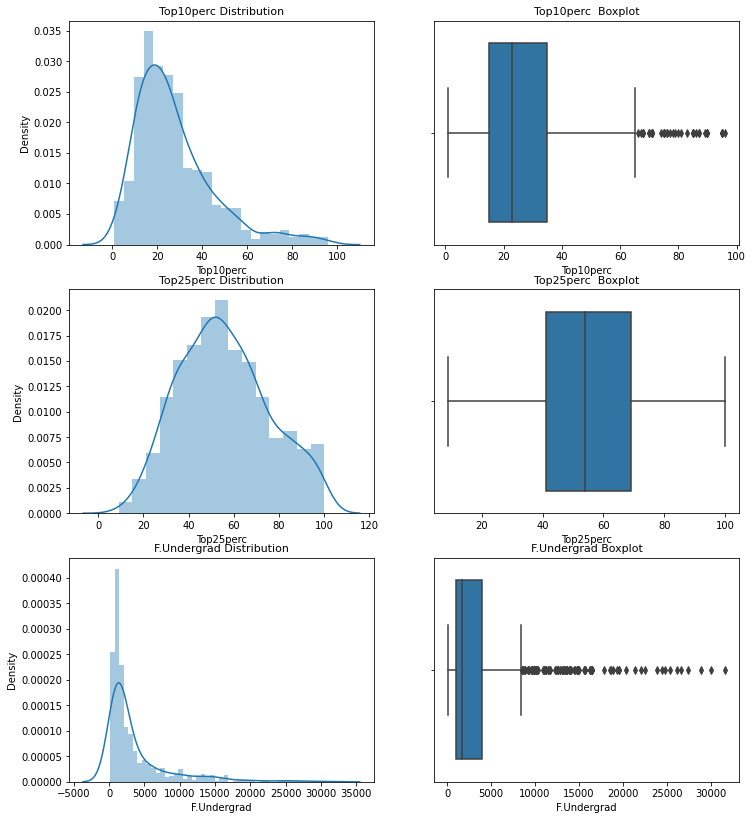

In [101]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(12,14)
a = sns.distplot(data['Top10perc'], ax = axes[0][0])
a.set_title('Top10perc Distribution', fontsize = 11)

a = sns.boxplot(data['Top10perc'],orient ="v", ax = axes[0][1])
a.set_title("Top10perc  Boxplot",fontsize=11)

a = sns.distplot(data['Top25perc'], ax = axes[1][0])
a.set_title('Top25perc Distribution', fontsize = 11)

a = sns.boxplot(data['Top25perc'],orient ="v", ax = axes[1][1])
a.set_title('Top25perc  Boxplot', fontsize = 11)

a = sns.distplot(data['F.Undergrad'], ax = axes[2][0])
a.set_title('F.Undergrad Distribution', fontsize = 11)

a = sns.boxplot(data['F.Undergrad'],orient ="v", ax = axes[2][1])
a.set_title('F.Undergrad Boxplot', fontsize = 11)
plt.show()

From the above analysis ,Distribution plot shows Top10 perc and Top25 perc variables are little skwed skewed but more of normally distributed.Undergraduate is highly skewed.From the boxplots  it is evident that Top25 perc variable has no oulier.It is evident that the other two variables has outliers.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

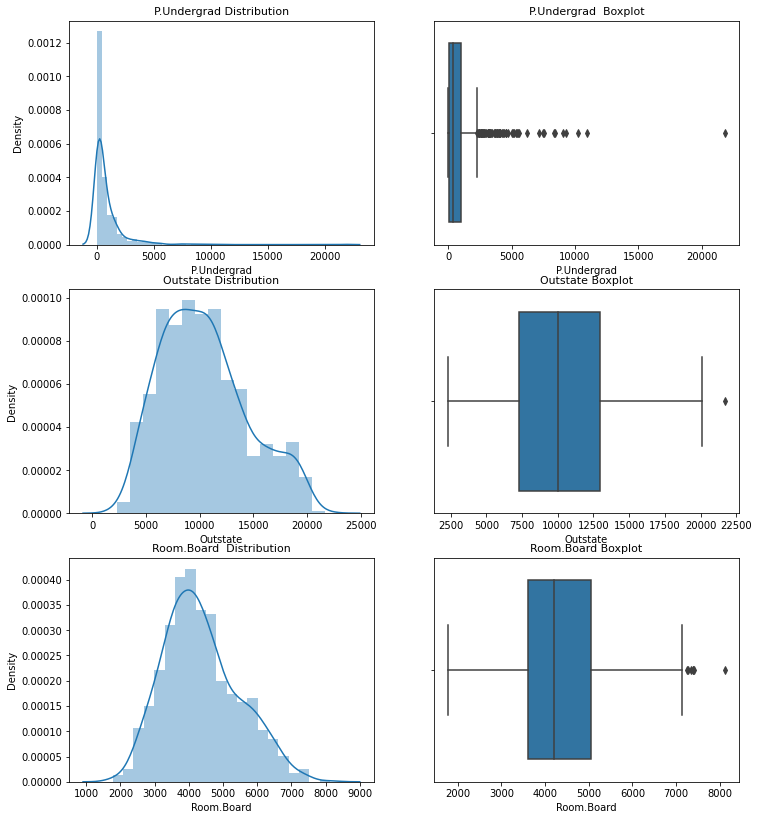

In [102]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(12,14)
a = sns.distplot(data['P.Undergrad'], ax = axes[0][0])
a.set_title('P.Undergrad Distribution', fontsize = 11)

a = sns.boxplot(data['P.Undergrad'],orient ="v", ax = axes[0][1])
a.set_title("P.Undergrad  Boxplot",fontsize=11)

a = sns.distplot(data['Outstate'], ax = axes[1][0])
a.set_title('Outstate Distribution', fontsize = 11)

a = sns.boxplot(data['Outstate'],orient ="v", ax = axes[1][1])
a.set_title('Outstate Boxplot', fontsize = 11)

a = sns.distplot(data['Room.Board'], ax = axes[2][0])
a.set_title('Room.Board  Distribution', fontsize = 11)

a = sns.boxplot(data['Room.Board'],orient ="v", ax = axes[2][1])
a.set_title('Room.Board Boxplot', fontsize = 11)
plt.show()

From the above analysis ,Distribution plot shows outstate and Room Board variables are little skewed but more of normally distributed.             P.Undergraduate is highly skewed.From the boxplots it is evident that Room Board and outstate variable has no oulier and P.undergraduate has outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

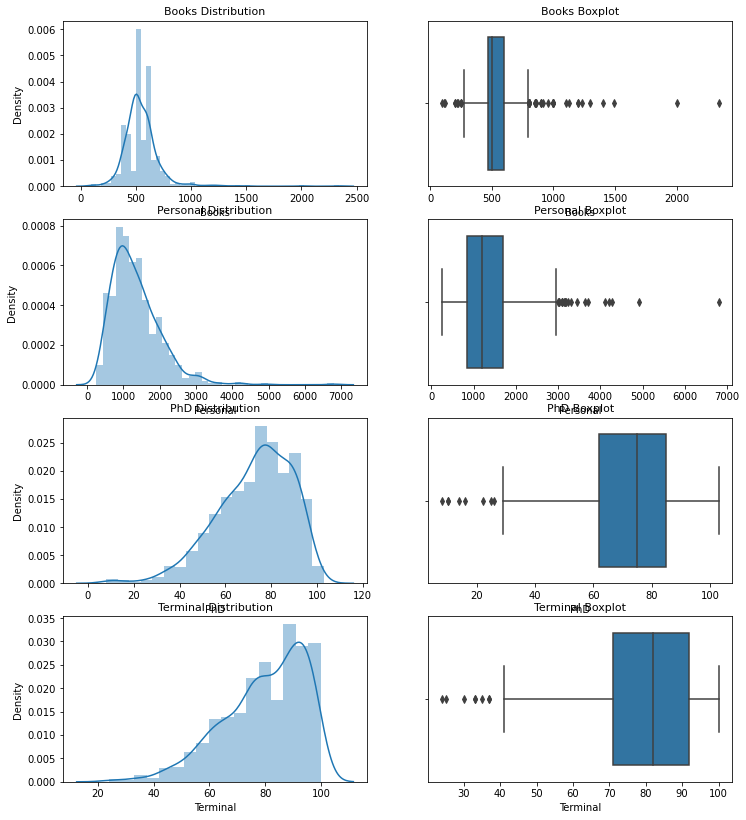

In [103]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(12,14)
a = sns.distplot(data['Books'], ax = axes[0][0])
a.set_title('Books Distribution', fontsize = 11)

a = sns.boxplot(data['Books'],orient ="v", ax = axes[0][1])
a.set_title("Books Boxplot",fontsize=11)

a = sns.distplot(data['Personal'], ax = axes[1][0])
a.set_title('Personal Distribution', fontsize = 11)

a = sns.boxplot(data['Personal'],orient ="v", ax = axes[1][1])
a.set_title('Personal Boxplot', fontsize = 11)

a = sns.distplot(data['PhD'], ax = axes[2][0])
a.set_title('PhD Distribution', fontsize = 11)

a = sns.boxplot(data['PhD'],orient ="v", ax = axes[2][1])
a.set_title('PhD Boxplot', fontsize = 11)

a = sns.distplot(data['Terminal'], ax = axes[3][0])
a.set_title('Terminal Distribution', fontsize = 11)

a = sns.boxplot(data['Terminal'],orient ="v", ax = axes[3][1])
a.set_title('Terminal Boxplot', fontsize = 11)

plt.show()

From the above analysis ,Distribution plot shows Books and Personal variables are skewed but more of normally distributed and its evident from boxplot has outliers.Phd and terminal are  highly left skewed.From the boxplots it is evident that phd and terminal also has outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

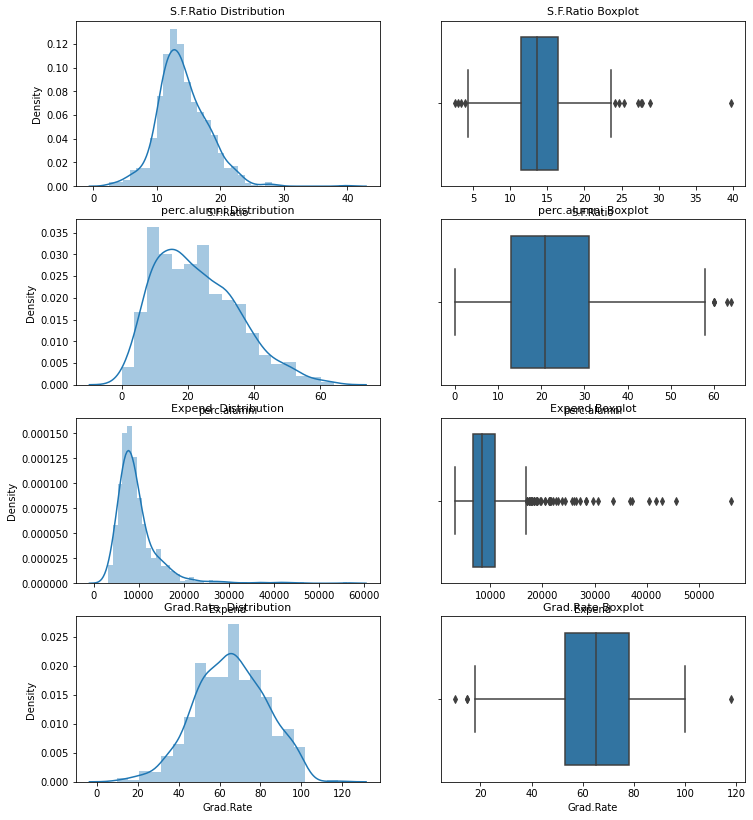

In [104]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(12,14)
a = sns.distplot(data['S.F.Ratio'], ax = axes[0][0])
a.set_title('S.F.Ratio Distribution', fontsize = 11)

a = sns.boxplot(data['S.F.Ratio'],orient ="v", ax = axes[0][1])
a.set_title("S.F.Ratio Boxplot",fontsize=11)

a = sns.distplot(data['perc.alumni'], ax = axes[1][0])
a.set_title('perc.alumni Distribution', fontsize = 11)

a = sns.boxplot(data['perc.alumni'],orient ="v", ax = axes[1][1])
a.set_title('perc.alumni Boxplot', fontsize = 11)

a = sns.distplot(data['Expend'], ax = axes[2][0])
a.set_title('Expend  Distribution', fontsize = 11)

a = sns.boxplot(data['Expend'],orient ="v", ax = axes[2][1])
a.set_title('Expend Boxplot', fontsize = 11)

a = sns.distplot(data['Grad.Rate'], ax = axes[3][0])
a.set_title('Grad.Rate  Distribution', fontsize = 11)

a = sns.boxplot(data['Grad.Rate'],orient ="v", ax = axes[3][1])
a.set_title('Grad.Rate Boxplot', fontsize = 11)

plt.show()

From the above analysis ,Distribution plot shows S.F ratio  and perc.alumuni variables are little skewed but more of normally distributed and its evident from boxplot has  few outliers.Expend  is right skewed and grad rate is normally dstributed .From the boxplots it is evident that expend and grad rate  has outliers.

Bivariate -Analysis

A Pairplot allow us to see both distributions of single variables and the relationship between two variables.
The histograms on diagnals allow us to see the distribution of single variables.
While the scatter plot on the upper and lower traingle shows the realtionship between the two variables.
Pairplot is the great method to identify trends for the follow up analysis .

In [108]:
sns.pairplot(data,size=3)

Output hidden; open in https://colab.research.google.com to view.

In [109]:
data.duplicated().sum()



0



Lets create a scatterplot of Grad.Rate versus Room.Board.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



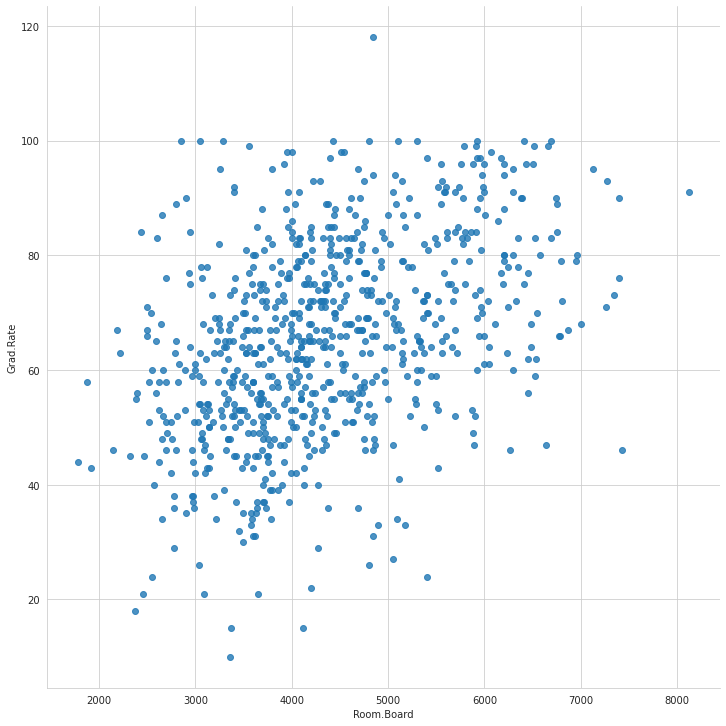

In [112]:
sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=data,palette='magma',size=10,aspect=1,fit_reg=False,)

There is a positive correlation between graduation rate and the cost of room board (0.42).It says with the increase in 
cost of baord the graduation rate will increase .

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



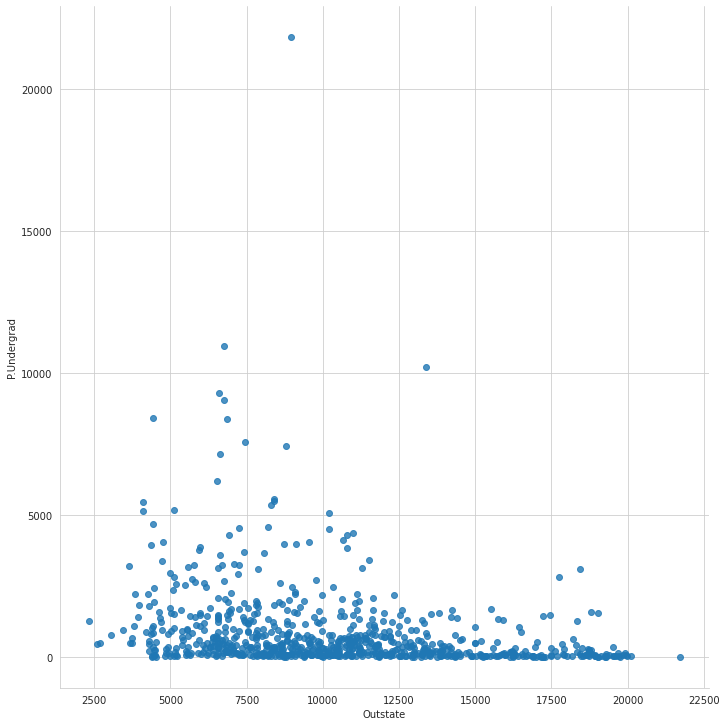

In [114]:


sns.set_style('whitegrid')
sns.lmplot('Outstate','P.Undergrad',data=data,
           palette='magma',size=10,aspect=1,fit_reg=False);


The scatter plot between number of part-time undergraduate students and out station tuition is negatively correlated with -0.2.53 correlation.
It says with the increase in out-state-tuitions the number of part-time graduation decreases.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



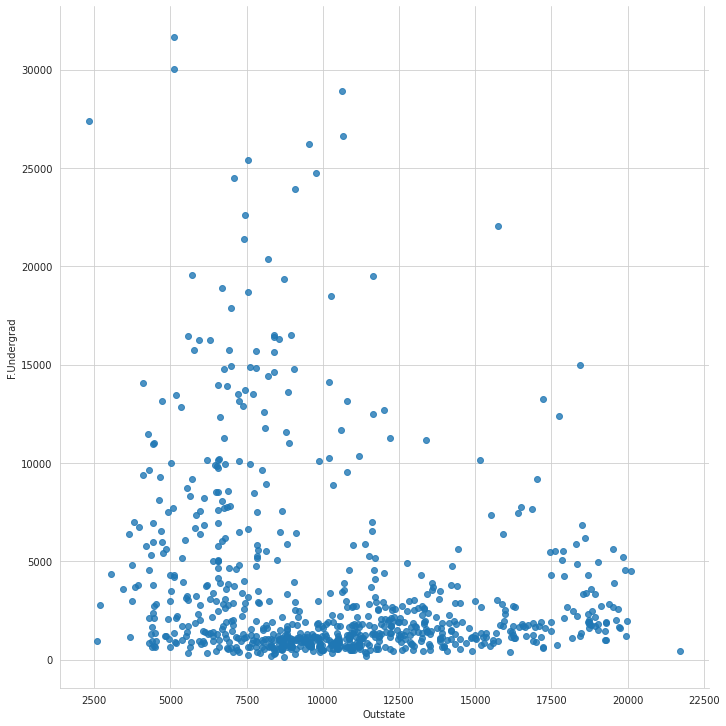

In [115]:

sns.lmplot('Outstate','F.Undergrad',data=data,
           palette='magma',size=10,aspect=1,fit_reg=False);

The scatter plot between full time undergraduate students and out station tuition is negatively correlated with -0.215 correlation. It says with the increase in out-state tuitions the number of full-time graduate students decreases.

In [116]:

sns.lmplot('Enroll','F.Undergrad',data=data1,
           palette='magma',size=10,aspect=1,fit_reg=False);

NameError: ignored

The scatter plot between number of new students enrolled and number of full time graduation students is positively correlated 
with highest correlation of 0.96 .It says with the increase in number of new students enrolled the number of full-time graduate students increases.

The scatter plot only offers visual information about the degree of correlation. In order to obtain more precise information we can use the inbuilt .corr() method in Pandas. This returns a table with all the correlations calculated for the numerical columns.

In [117]:
data.corr()   # displays the correlation between every possible pair of attributes as a dataframe

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


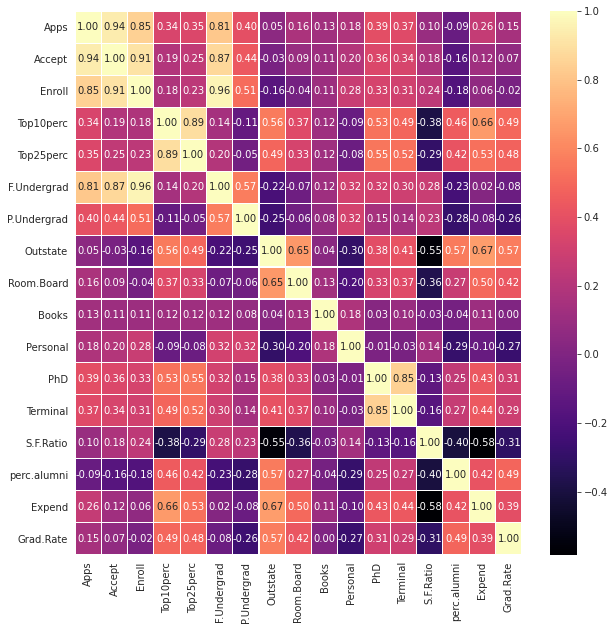

In [118]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

We can see the correlation relationship between the variables using corr().
As a rule of thumb,if the correlation value is more than 0.70 it is said to be highly correlated.
In that case we need to take steps to rmeove the correlations.
The light color indicates there is high correlations and dark color indiacates low correlations.
Accept with respect to app has high correlation 0.94
Enroll with respect to app has high correlation 0.81
Enroll with respect to accept has high correlation 0.91
F grad with respect to apps has high correlation 0.81 
F grad with respect to accept has high correlation 0.87
F grad with to enroll has high correlation 0.96
Top 25 perc with respect to Top 10 perc has 0.89


From the above correlation plot,we can see that apps,accept ,enroll and F.Undergraduate are poistive highly correlated .
Even Top 25 perc and Top 10 are alo highly correlated.

Scatter Plots to see the correlation between variables

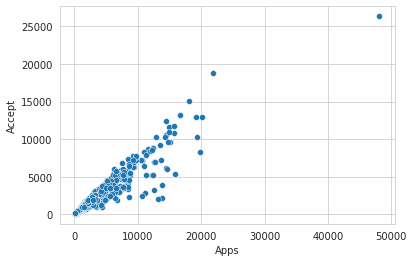

In [119]:
sns.scatterplot(x='Apps',y='Accept',data=data);

Linear relation is seen between apps and accept with one outlier.

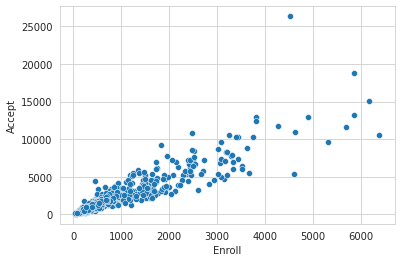

In [120]:
sns.scatterplot(x='Enroll',y='Accept',data=data);

There are n number of enrollement in a particular area with respect to acceptance.


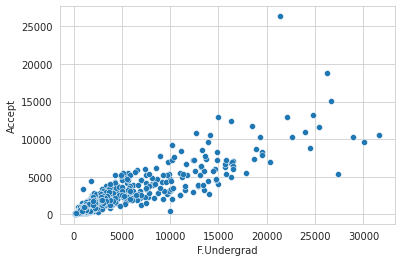

In [121]:
sns.scatterplot(x='F.Undergrad',y='Accept',data=data);

From the above scatterplot we see the plots shows the linear relationship among each other.
A point noted is that PCA is also one of the technique used to treat the multicollinearity in data.

Outlier Check

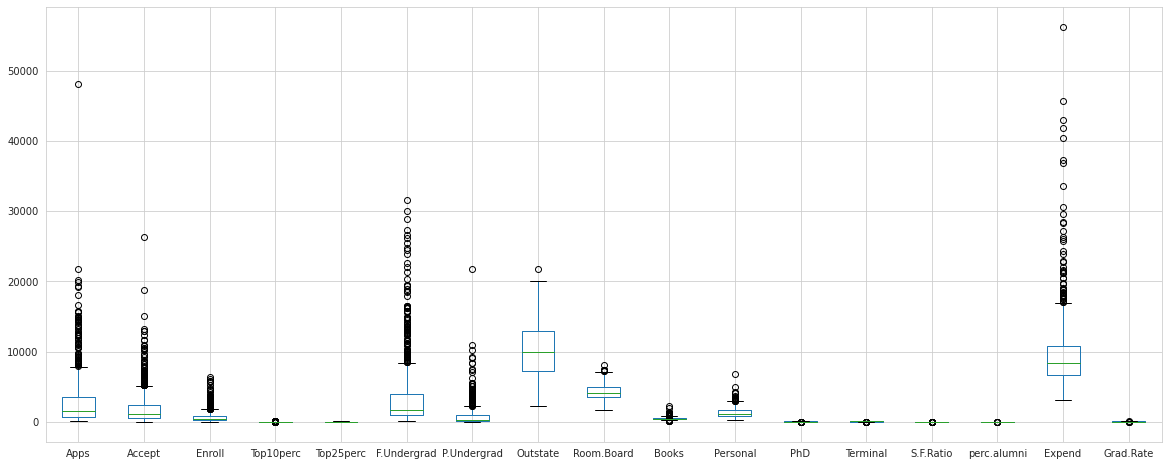

In [122]:
data.boxplot(figsize=(20,8))

There are outliers in data.

Since the name column has the unique values ,so will remove it from the data set.


In [123]:
d=data.drop('Names',axis = 1)
d.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


For Pca all variables scales should be same units ,so  we do scaling using standardscaler.
The scaling is done only for continous variables.


In [124]:
from sklearn.preprocessing import StandardScaler
x=pd.DataFrame(StandardScaler().fit_transform(d),columns=d.columns)
# or

# from scipy.stats import zscore
# data2=data2.apply(zscore)
# data2.head()



In [125]:
x.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


PCA is affected by scale so we need to scale the feature before applying PCA analysis.
Here the standard scaler is used to scale the data set features onto unit scale.
(mean=0,variance=1) which is the optimal requiremnt of any machine learning algorithm .
Centering and scaling happen on each feature ,mean and standard deviation are to be stored to be used on later data using transform.


Comparision of covariance marix and correlation matrix after scaling

In [126]:
x.cov()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.001289,0.944666,0.847913,0.339270,0.352093,0.815540,0.398777,0.050224,0.165152,0.132729,0.178961,0.391201,0.369968,0.095756,-0.090342,0.259927,0.146944
Accept,0.944666,1.001289,0.912811,0.192695,0.247795,0.875350,0.441839,-0.025788,0.091016,0.113672,0.201248,0.356216,0.338018,0.176456,-0.160196,0.124878,0.067399
Enroll,0.847913,0.912811,1.001289,0.181527,0.227037,0.965883,0.513730,-0.155678,-0.040284,0.112856,0.281291,0.331896,0.308671,0.237577,-0.181027,0.064252,-0.022370
Top10perc,0.339270,0.192695,0.181527,1.001289,0.893144,0.141471,-0.105492,0.563055,0.371959,0.119012,-0.093437,0.532513,0.491768,-0.385370,0.456072,0.661765,0.495627
Top25perc,0.352093,0.247795,0.227037,0.893144,1.001289,0.199702,-0.053646,0.490024,0.331917,0.115676,-0.080914,0.546566,0.525425,-0.295009,0.418403,0.528127,0.477896
F.Undergrad,0.815540,0.875350,0.965883,0.141471,0.199702,1.001289,0.571247,-0.216020,-0.068979,0.115699,0.317608,0.318747,0.300406,0.280064,-0.229758,0.018676,-0.078875
P.Undergrad,0.398777,0.441839,0.513730,-0.105492,-0.053646,0.571247,1.001289,-0.253839,-0.061405,0.081304,0.320294,0.149306,0.142086,0.232830,-0.281154,-0.083676,-0.257332
Outstate,0.050224,-0.025788,-0.155678,0.563055,0.490024,-0.216020,-0.253839,1.001289,0.655100,0.038905,-0.299472,0.383476,0.408509,-0.555536,0.566992,0.673646,0.572026
Room.Board,0.165152,0.091016,-0.040284,0.371959,0.331917,-0.068979,-0.061405,0.655100,1.001289,0.128128,-0.199685,0.329627,0.375022,-0.363095,0.272714,0.502386,0.425489
Books,0.132729,0.113672,0.112856,0.119012,0.115676,0.115699,0.081304,0.038905,0.128128,1.001289,0.179526,0.026940,0.100084,-0.031970,-0.040260,0.112554,0.001062


In covariance scaling the items is required but in case of correlation no need of scaling.
Covariance matrix indicates the direction of linear relationship between the variables .
Correlation matrix indicates both the strength and drection of linear relationship between the variables.
So correlation matrix is by default its standardised .


In [127]:
import numpy as np

In [128]:
cov_matrix =np.cov(x.T)
print('Covariance Matrix \n',cov_matrix)
# or 
# mean_vec=np.mean(X_std, axis=0)
# cov_mat=(X_std-mean_vec).T.dot(X_std - mean_vec) /(X_std.shape[0]-1)
# print('Covariance Matrix \n%s',cov_mat)


Covariance Matrix 
 [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441  

In [129]:

x.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


Covariance indicates the direction of the linear relationship  between the variables .Correltion onthe other hand measure both the strength and direction of the linear relationship between the two variables.
Correlation is the function of covariance.
we can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.

Build covariance matrix ,eigen values and eigen vectors.

Covariance Matrix 

In [130]:
cov=x.cov()

In [131]:
cov

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.001289,0.944666,0.847913,0.339270,0.352093,0.815540,0.398777,0.050224,0.165152,0.132729,0.178961,0.391201,0.369968,0.095756,-0.090342,0.259927,0.146944
Accept,0.944666,1.001289,0.912811,0.192695,0.247795,0.875350,0.441839,-0.025788,0.091016,0.113672,0.201248,0.356216,0.338018,0.176456,-0.160196,0.124878,0.067399
Enroll,0.847913,0.912811,1.001289,0.181527,0.227037,0.965883,0.513730,-0.155678,-0.040284,0.112856,0.281291,0.331896,0.308671,0.237577,-0.181027,0.064252,-0.022370
Top10perc,0.339270,0.192695,0.181527,1.001289,0.893144,0.141471,-0.105492,0.563055,0.371959,0.119012,-0.093437,0.532513,0.491768,-0.385370,0.456072,0.661765,0.495627
Top25perc,0.352093,0.247795,0.227037,0.893144,1.001289,0.199702,-0.053646,0.490024,0.331917,0.115676,-0.080914,0.546566,0.525425,-0.295009,0.418403,0.528127,0.477896
F.Undergrad,0.815540,0.875350,0.965883,0.141471,0.199702,1.001289,0.571247,-0.216020,-0.068979,0.115699,0.317608,0.318747,0.300406,0.280064,-0.229758,0.018676,-0.078875
P.Undergrad,0.398777,0.441839,0.513730,-0.105492,-0.053646,0.571247,1.001289,-0.253839,-0.061405,0.081304,0.320294,0.149306,0.142086,0.232830,-0.281154,-0.083676,-0.257332
Outstate,0.050224,-0.025788,-0.155678,0.563055,0.490024,-0.216020,-0.253839,1.001289,0.655100,0.038905,-0.299472,0.383476,0.408509,-0.555536,0.566992,0.673646,0.572026
Room.Board,0.165152,0.091016,-0.040284,0.371959,0.331917,-0.068979,-0.061405,0.655100,1.001289,0.128128,-0.199685,0.329627,0.375022,-0.363095,0.272714,0.502386,0.425489
Books,0.132729,0.113672,0.112856,0.119012,0.115676,0.115699,0.081304,0.038905,0.128128,1.001289,0.179526,0.026940,0.100084,-0.031970,-0.040260,0.112554,0.001062


Here we need to calculate the eigen values and eigen vector as this gives us values to form principle component .
Its gives the variability .
Like how much variability is explained by PCa1 and Pca2 and so on .
Eigen values gives the variance and eigen vectors gives the direction.



In [132]:
eigvals,eigvecs=np.linalg.eig(cov)

Eigen Values

In [133]:
eigvals

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.02302787, 0.03672545, 0.31344588, 0.08802464, 0.1439785 ,
       0.16779415, 0.22061096])

As a rule of thumb ,if eigen values is greater than equal to 1 are considered as number of components .
Here there are 4 principal components .

Eigen Vectors

In [134]:
eigvecs

array([[-2.48765602e-01,  3.31598227e-01,  6.30921033e-02,
        -2.81310530e-01,  5.74140964e-03,  1.62374420e-02,
         4.24863486e-02,  1.03090398e-01,  9.02270802e-02,
        -5.25098025e-02,  3.58970400e-01, -4.59139498e-01,
         4.30462074e-02, -1.33405806e-01,  8.06328039e-02,
        -5.95830975e-01,  2.40709086e-02],
       [-2.07601502e-01,  3.72116750e-01,  1.01249056e-01,
        -2.67817346e-01,  5.57860920e-02, -7.53468452e-03,
         1.29497196e-02,  5.62709623e-02,  1.77864814e-01,
        -4.11400844e-02, -5.43427250e-01,  5.18568789e-01,
        -5.84055850e-02,  1.45497511e-01,  3.34674281e-02,
        -2.92642398e-01, -1.45102446e-01],
       [-1.76303592e-01,  4.03724252e-01,  8.29855709e-02,
        -1.61826771e-01, -5.56936353e-02,  4.25579803e-02,
         2.76928937e-02, -5.86623552e-02,  1.28560713e-01,
        -3.44879147e-02,  6.09651110e-01,  4.04318439e-01,
        -6.93988831e-02, -2.95896092e-02, -8.56967180e-02,
         4.44638207e-01,  1.1

In [149]:
tot = sum(eigvals)
var_exp = [( i /tot ) * 100 for i in sorted(eigvals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


Plot Cumulative explained variance and individual explained variance vs Principal Components

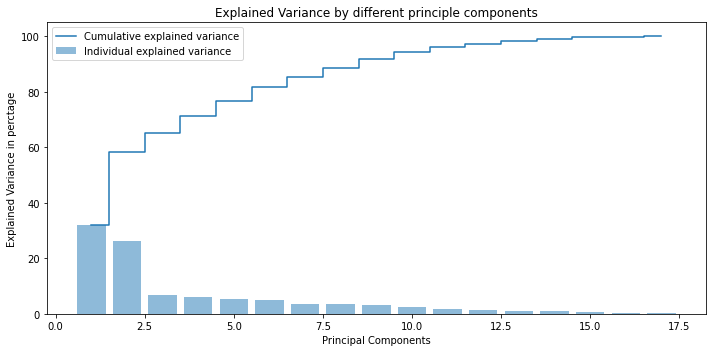

In [85]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigvals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigvals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance in perctage')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.title("Explained Variance by different principle components")
plt.tight_layout()
plt.show()


As per the eigen values and commulative variance plot -
The variance explained by only 4 principle component can explain 71% of variance in data.


Scree Plot

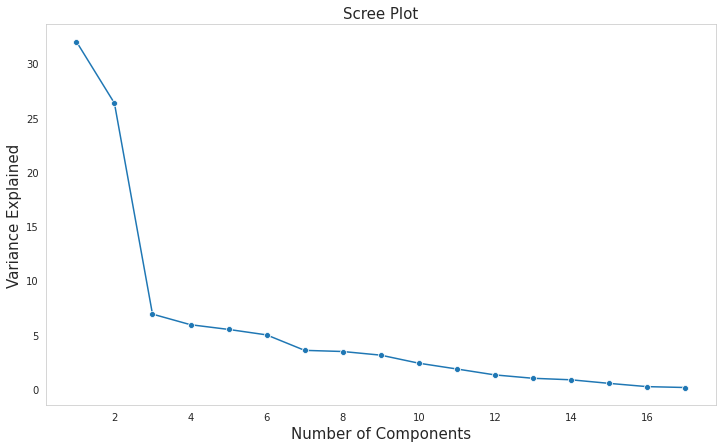

In [152]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()
or
# plt.plot(var_exp)

Scree plot is nothing but the commulative variance explained .
Scree plot is steep curve .Here the steep is 2 PCA which is only 58%.
But we will consider 4 principal components that explains 71% of commulative varaince.


Commulative value of eigen values.
On the basis of it we will decide the optimum number of principle components.
Eigen vector indicates here
Perform PCA and export the data of principle component scores into a data frame.

In [154]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

#There are 17 column so we will take n_omponents as 17 here .

pca = PCA(n_components=17)
pc = pca.fit_transform(x)
pc.transpose()


array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [ 1.75239502e-03,  1.03709803e-01, -2.25582869e-02, ...,
         6.79013123e-02,  3.53597440e-01, -1.14873492e-01],
       [-9.31400698e-02, -5.02556890e-02, -4.05268301e-03, ...,
        -2.32023970e-01,  3.04416200e-01, -1.17076127e-01],
       [ 9.35522023e-02, -1.74057054e-01,  3.75875882e-03, ...,
        -9.99380421e-02,  3.35104811e-01, -2.57218339e-03]])

In [156]:
pcadf=pd.DataFrame(data=pc,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17'])

In [157]:
pcadf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17
0,-1.592855,0.767334,-0.101074,-0.921749,-0.743975,-0.298306,0.638443,-0.879386,0.093084,0.048593,0.399747,-0.089690,-0.052098,0.180140,0.001752,-0.093140,0.093552
1,-2.192402,-0.578830,2.278798,3.588918,1.059997,-0.177137,0.236753,0.046925,1.113780,0.965154,-0.212509,0.097239,-0.243518,-0.744204,0.103710,-0.050256,-0.174057
2,-1.430964,-1.092819,-0.438093,0.677241,-0.369613,-0.960592,-0.248276,0.308740,-0.105452,0.640660,-0.154993,-0.344731,0.097551,0.227527,-0.022558,-0.004053,0.003759
3,2.855557,-2.630612,0.141722,-1.295486,-0.183837,-1.059508,-1.249356,-0.147694,0.378997,0.461244,-0.420651,0.687143,-0.075461,-0.003380,-0.073181,-0.191546,-0.175254
4,-2.212008,0.021631,2.387030,-1.114538,0.684451,0.004918,-2.159220,-0.624413,-0.160383,0.363428,-0.153339,-0.050552,0.267207,-0.614409,-0.273993,0.010653,0.048344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-3.328458,1.220255,-0.383388,0.108555,0.776996,0.309429,-0.165021,0.347435,0.545218,0.876458,0.447952,-0.029980,0.274732,-0.392414,0.048877,0.069005,0.012057
773,0.199389,-0.686689,0.051564,0.562269,0.375191,0.373343,0.848453,0.626515,-0.072041,-0.311567,0.012782,0.201674,-0.088843,-0.339420,0.081479,-0.111415,-0.046808
774,-0.732561,-0.077235,-0.000406,0.054316,-0.516021,0.468014,-1.317492,-0.128288,0.212375,0.300443,-0.471931,0.448232,0.083219,-0.041142,0.067901,-0.232024,-0.099938
775,7.919327,-2.068329,2.073564,0.852054,-0.947755,-2.069937,0.083328,-0.552586,0.081969,0.924892,2.242207,1.363251,0.076113,-0.074911,0.353597,0.304416,0.335105


Here pca is done for continous variables.Because we canot take the levels of categorical variable and project onto space.

In [158]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

Eigen vectors makes understanding of the linear transformation eazy.
Eigen vectors are direction along which linear transformation acts by simply compressing .
Eigen values gives us the factors/values by which the compression occurs.
The more eigen vectors we have its easier to understand the linear transformation .



Commulative Percentage of variance accounted by Principle components 

In [159]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([32. , 58.3, 65.2, 71.1, 76.6, 81.6, 85.2, 88.7, 91.8, 94.2, 96. ,
       97.3, 98.3, 99.1, 99.6, 99.8, 99.9])

The Cumulative % gives the percentage of variance accounted for by the n components.
For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first
and second components. It helps in deciding the number of components by selecting the components which explained the 
high variance.

In the above array we see that the first feature explains 32% of the variance within our data set while 
the first two explain 58.3 and so on. If we employ 13 features we capture ~ 98.3% of the variance within the dataset,
thus we gain very little by implementing an additional feature (think of this as diminishing marginal return on total 
variance explained).This means if if consider 13 features we get 98.3% variance explained but if we consider only 4 PCA then 71% of variance is explained by pinciple components.

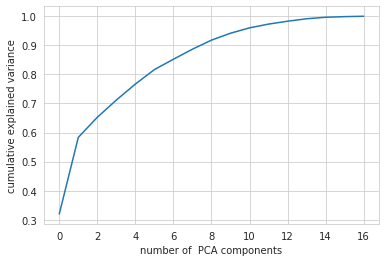

In [161]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of  PCA components')
plt.ylabel('cumulative explained variance')
plt.show()

With 2 pca variance explained is 58.3%

Explicit form of first PCA in terms of eigen vector

The equation for the first pca would be the cross multiplication of variables and eigen vectors of 0 index.

In [182]:
eigvecs[0]

array([-0.2487656 ,  0.33159823,  0.0630921 , -0.28131053,  0.00574141,
        0.01623744,  0.04248635,  0.1030904 ,  0.09022708, -0.0525098 ,
        0.3589704 , -0.4591395 ,  0.04304621, -0.13340581,  0.0806328 ,
       -0.59583097,  0.02407091])

In [191]:
eigvecs[1]

array([-0.2076015 ,  0.37211675,  0.10124906, -0.26781735,  0.05578609,
       -0.00753468,  0.01294972,  0.05627096,  0.17786481, -0.04114008,
       -0.54342725,  0.51856879, -0.05840559,  0.14549751,  0.03346743,
       -0.2926424 , -0.14510245])

PC1 :-0.2487656*Apps+0.33*Accept+0.06*Enroll+-0.281*Top10perc+0.005*Top25perc+0.016*F.Undergrad+0.042*P.Undergrad+0.103*Outstate+0.09*Room.Board+-0.052*Books+0.35*Personal+-0.45*Phd+0.04*Terminal+-0.133*S.F.Ratio+0.080*perc.Alumuni+-0.595*Expend+0.024*Grad.Rate.

Business implication of PCA for this case study :
PCA is an unsupervised technique because here we dont have any specific target used for feature reduction basis variance explained.
Pca can be used for removing  the multicollinearity. 
Pca is a tool used to reduce the multidimensional data to lower dimensional data while retaining most of the information using PC componenets.
PCA is well estabilished mathematical technique for reducing the dimensionality of data while keeping as much varaition as possible.

